In [206]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle

RELATIVE_PATH='../evolving_networks/images/run_images/' #relative path of latex repo for saving pictures

In [207]:
runs = glob.glob("runs/evolution_*")+glob.glob("runs/cee_*")

In [208]:
runs

['runs/evolution_cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_evo_mode_greedy',
 'runs/evolution_cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_evo_mode_best',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_greedy',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_best',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_random',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.25_e64_h64_len5_voc5_cull_mode_age']

In [209]:
results = {}
for r in runs:
    results[r] = {}
    seeds = glob.glob("{}/*".format(r))
    for seed in seeds:
        s = int(seed.split('/')[-1])
        results[r][s] = {}
        saved_metrics = glob.glob("{}/metrics*.p".format(seed))
        for m in saved_metrics:
            iteration = int(m.split("_")[-1].split(".")[0])
            p=pickle.load(open(m, 'rb'))
            results[r][s][iteration] = p

In [210]:
def get_run_name(run):
    if "evolution" in run:
        if 'greedy' in run:
            return "evolution_greedy"
        else:
            return "evolution"
    else:
        return "cee_"+run.split("_")[-1]
    
def plot_metric(results, metrics=["avg_convergence"], ylabel=None, show_error=True, 
                savefig=True, figname=None, title=None, ylim=None):
    
    ci = 'sd' if show_error else None
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    
    run_names = []
    metric_names = []
    iterations = []
    values = []
    
    for m in metrics:
        for r in runs:
            run_name = get_run_name(r)
            if run_name == 'evolution_greedy':
                continue
            for s in list(results[r].keys()):    
                for iteration_number in sorted(list(results[r][s].keys())):
                    if iteration_number == 0:
                        continue
                    iterations.append(iteration_number)
                    values.append(results[r][s][iteration_number][m])
                    run_names.append(run_name)
                    metric_names.append(m)
            
    values = np.array(values)
    iterations = np.array(iterations)        
    if len(metrics) < 2:     
        d = {'Number of Iterations': iterations, m: values, 'Run Name': run_names, 'Metric': metric_names}
        ax = sns.lineplot(ax=ax, x='Number of Iterations', y=m, data=pd.DataFrame(data=d), style='Run Name', hue='Run Name', ci=ci, palette='colorblind')
        if ylabel is None:
            ylabel = m
    else:
        d = {'Number of Iterations': iterations, 'val': values, 'Run Name': run_names, 'Metric': metric_names}
        ax = sns.lineplot(ax=ax, x='Number of Iterations', y='val', data=pd.DataFrame(data=d), style="Metric", hue="Run Name", ci=ci, palette='colorblind')
        if ylabel is None:
            ylabel = ""
        
    ax.set(xlabel='Number of Iterations', ylabel=ylabel)

    if ylim is not None:
        ax.set(ylim=ylim)
    if title is not None:
        ax.set_title(title)
    
    if savefig:
        if figname is None:
            figname = ylabel
        plt.savefig(RELATIVE_PATH+figname)
    plt.show()

In [211]:
list(results[runs[0]][43][5000].keys())

['loss',
 'acc',
 'entropy',
 'l_entropy',
 'rsa_sr',
 'rsa_si',
 'rsa_ri',
 'rsa_sm',
 'pseudo_tre',
 'topological_similarity',
 'num_unique_messages',
 'kl_divergence',
 'jaccard_similarity',
 'avg_message_dist',
 'avg_matches',
 'avg_age',
 'avg_convergence',
 'avg_convergence_at_10',
 'avg_convergence_at_100']

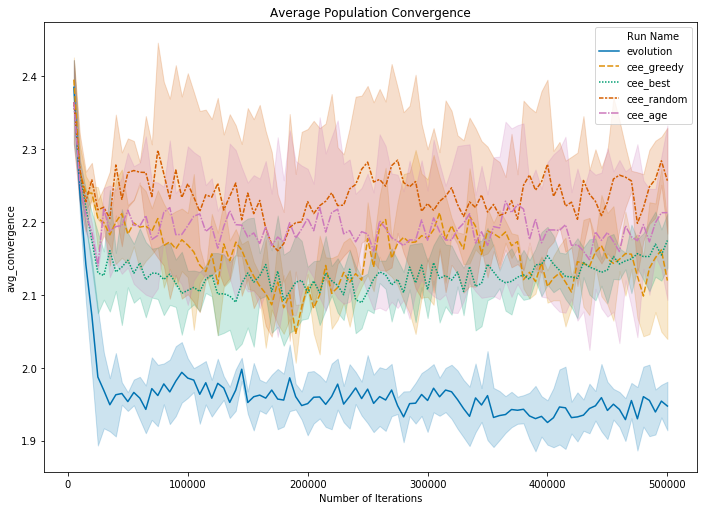

In [212]:
plot_metric(results, metrics=['avg_convergence'], savefig=True, title='Average Population Convergence')

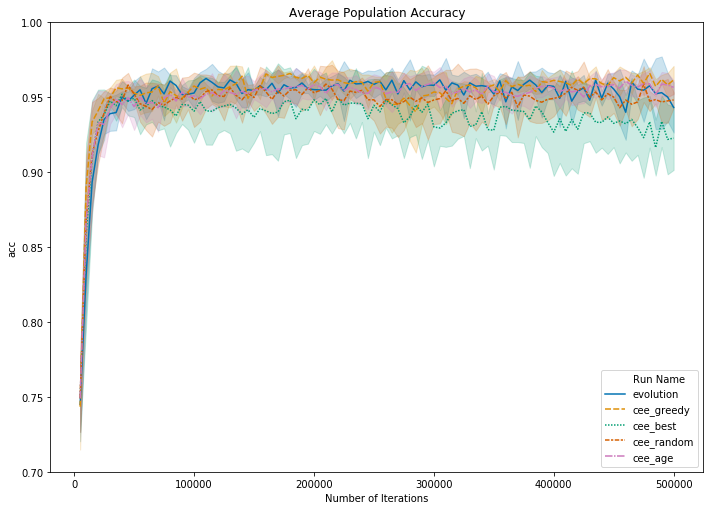

In [213]:
plot_metric(results, metrics=["acc"], savefig=True, title='Average Population Accuracy', ylim=(0.7, 1.0))

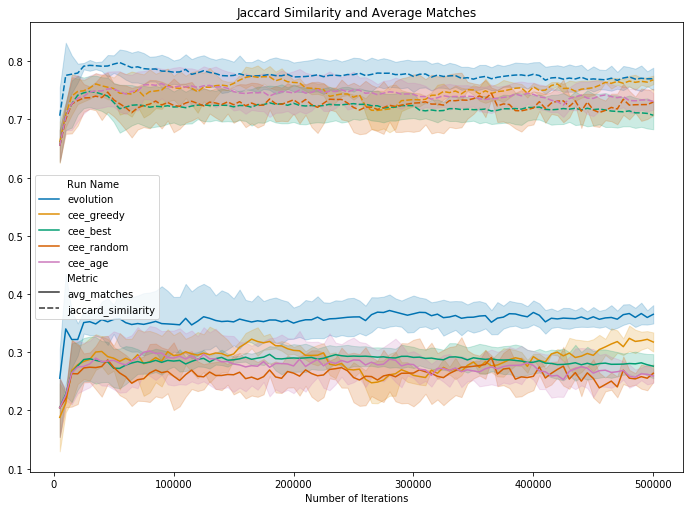

In [214]:
plot_metric(results, metrics=['avg_matches', 'jaccard_similarity'], show_error=True, savefig=True, 
            figname='similarity', title='Jaccard Similarity and Average Matches')

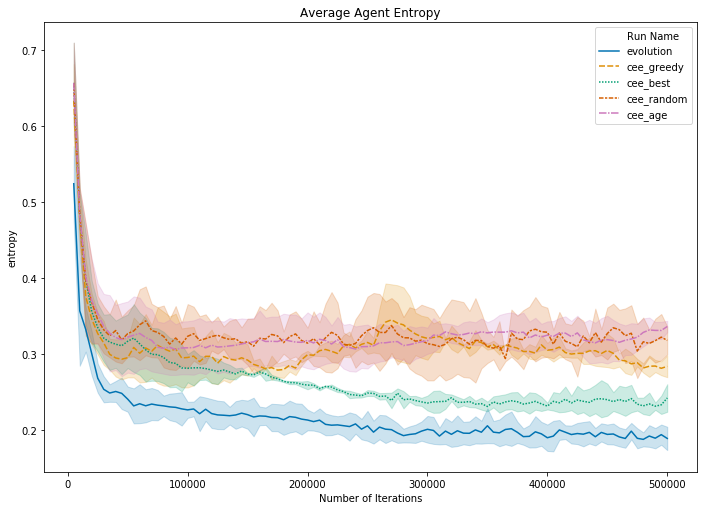

In [215]:
plot_metric(results, metrics=['entropy'], show_error=True, title="Average Agent Entropy")

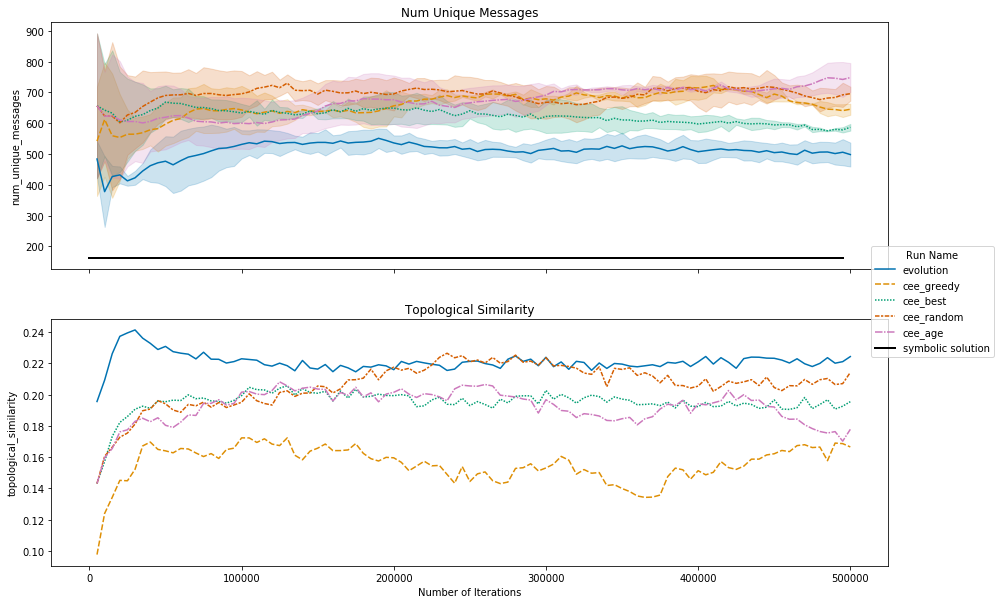

In [216]:
def plot_metric_same_x(results, metrics=["avg_convergence"], show_error=[True], 
                 savefig=True, figname=None, title=None, ylim=None):
    """
    same as plot metric except plots on shared x axis
    """
    a4_dims = (15, 10)
    
    fig, axes = plt.subplots(len(metrics), sharex=True, figsize=a4_dims)    
    legend = []
    for i, ax in enumerate(axes):
        run_names = []
        metric_names = []
        iterations = []
        values = []
        m = metrics[i]            
        for r in runs:
            run_name = get_run_name(r)
            if run_name == 'evolution_greedy':
                continue
            if run_name not in legend:
                legend.append(run_name)
            for s in list(results[r].keys()):    
                for iteration_number in sorted(list(results[r][s].keys())):
                    if iteration_number == 0:
                        continue
                    iterations.append(iteration_number)
                    values.append(results[r][s][iteration_number][m])
                    run_names.append(run_name)
                    metric_names.append(m)
            

        values = np.array(values)
        iterations = np.array(iterations)        

        ci = 'sd' if show_error[i] else None
        d = {'Number of Iterations': iterations, m: values, 'Run Name': run_names}
        ax = sns.lineplot(ax=ax, x='Number of Iterations', y=m, data=pd.DataFrame(data=d), 
                          style="Run Name", hue="Run Name", ci=ci, 
                          legend= False, palette='colorblind')
        
        if m == 'num_unique_messages':
            X = []
            Y = []
            for j in range(1, iterations[-1], 5000):
                X.append(j)
                Y.append(162)
                    
            ax = sns.lineplot(ax=ax, x=X, y=Y, ci=None, linewidth=2, 
                              legend= False, color='black')
            legend.append('symbolic solution')

        ax.set(xlabel='Number of Iterations', ylabel=m)

        if ylim is not None:
            ax.set(ylim=ylim)
        title = m.replace("_"," ").title()
        ax.set_title(title)

    if savefig:
        if figname is None:
            figname = ylabel
        plt.savefig(RELATIVE_PATH+figname)

    plt.figlegend(title='Run Name', loc='center right', labels=legend)
    plt.show()


plot_metric_same_x(results, metrics=["num_unique_messages", "topological_similarity"],
                  savefig=True, figname="topo_unique", show_error=[True, False])

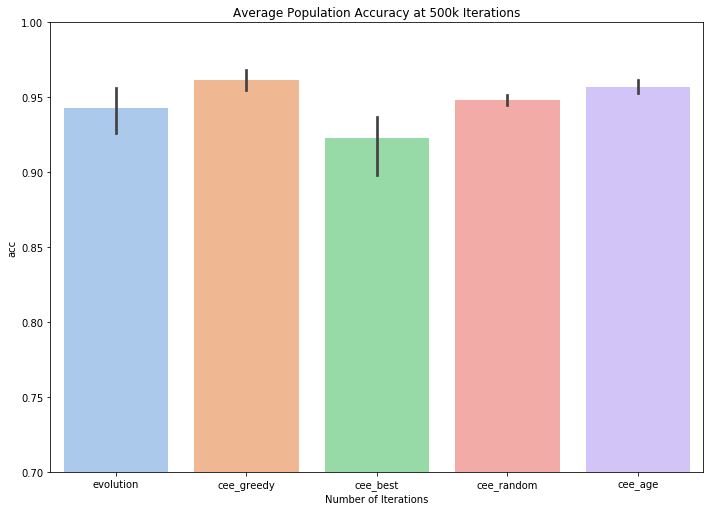

In [219]:
def plot_bar_chart(results, metric="avg_convergence", ylabel=None, 
                savefig=True, figname=None, title=None, ylim=None, unique_line=False):
    #plots bar chart for the metric at the last iteration
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    
    run_names = []
    metric_names = []
    iterations = []
    values = []
    
    m = metric
    for r in runs:
        run_name = get_run_name(r)
        if run_name == 'evolution_greedy':
            continue
        for s in list(results[r].keys()):
            sorted_iterations = sorted(list(results[r][s].keys()))
            iteration_number = sorted_iterations[-1]
            iterations.append(iteration_number)
            values.append(results[r][s][iteration_number][m])
            run_names.append(run_name)
            metric_names.append(m)
            
    values = np.array(values)
    iterations = np.array(iterations)      
    d = {'Number of Iterations': iterations, m: values, 'Run Name': run_names}
    ax = sns.barplot(ax=ax, x='Run Name', y=m, data=pd.DataFrame(data=d), palette="pastel")
    if ylabel is None:
        ylabel = m

    ax.set(xlabel='Number of Iterations', ylabel=ylabel)

    if ylim is not None:
        ax.set(ylim=ylim)
    if title is not None:
        ax.set_title(title)
    
    if savefig:
        if figname is None:
            figname = ylabel
        plt.savefig(RELATIVE_PATH+figname)
    plt.show()
    
plot_bar_chart(results, metric="acc", savefig=True, title="Average Population Accuracy at 500k Iterations", ylim=(0.7, 1.0), figname='acc_bar')